In the financial world, the ability to accurately predict loan approvals is crucial for both lenders and borrowers. For lenders, it minimizes the risk of financial losses due to defaults, while for borrowers, it provides faster and more informed decisions. This project explores a loan approval dataset to develop a predictive model that can effectively assess the likelihood of loan approval based on various applicant characteristics. By leveraging machine learning techniques and focusing on key evaluation metrics, we aim to build a robust model that can aid financial institutions in making informed lending decisions.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [30]:
df.shape

(4269, 13)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [32]:
df.isnull().sum()/len(df)

loan_id                      0.0
 no_of_dependents            0.0
 education                   0.0
 self_employed               0.0
 income_annum                0.0
 loan_amount                 0.0
 loan_term                   0.0
 cibil_score                 0.0
 residential_assets_value    0.0
 commercial_assets_value     0.0
 luxury_assets_value         0.0
 bank_asset_value            0.0
 loan_status                 0.0
dtype: float64

No null or missing values

In [33]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [34]:
# Rename columns by removing leading spaces
df = df.rename(columns=lambda x: x.strip())

# Verify the changes
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [36]:
cols = ['education', 'self_employed', 'loan_status']
for col in cols:
    print(df[col].value_counts())

education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64
self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64
loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64


In [37]:
cols = ['education', 'self_employed', 'loan_status']
for col in cols:
    print(df[col].value_counts())

education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64
self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64
loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64


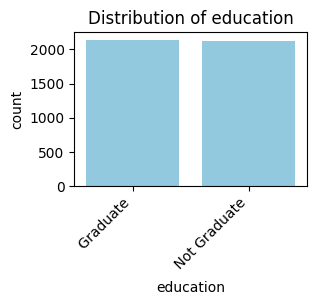

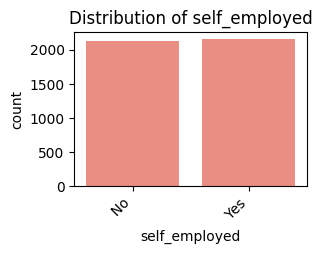

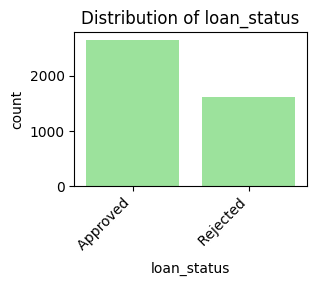

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['education', 'self_employed', 'loan_status']
colors = ['skyblue', 'salmon', 'lightgreen']  # Example colors
for i, col in enumerate(cols):
    plt.figure(figsize=(3, 2))  # Reduced figure size
    sns.countplot(x=col, data=df, color=colors[i])  # Use different colors
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

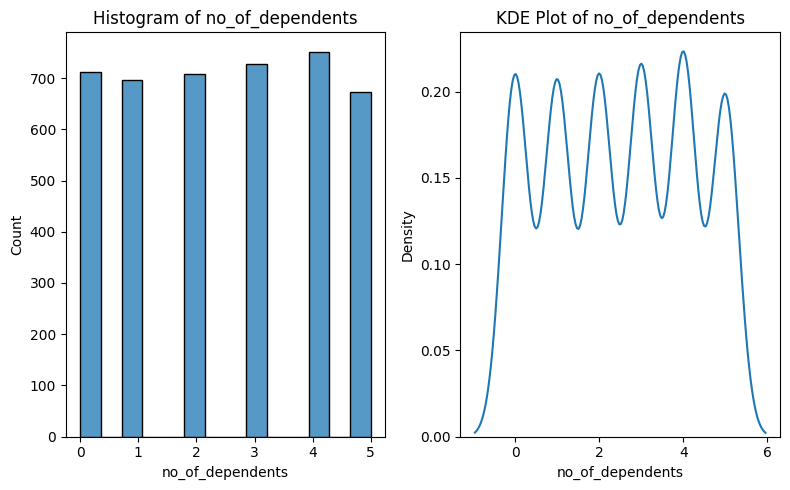

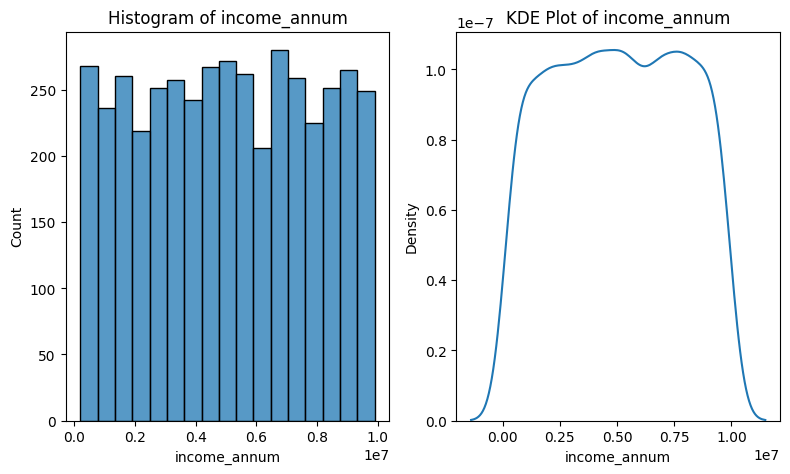

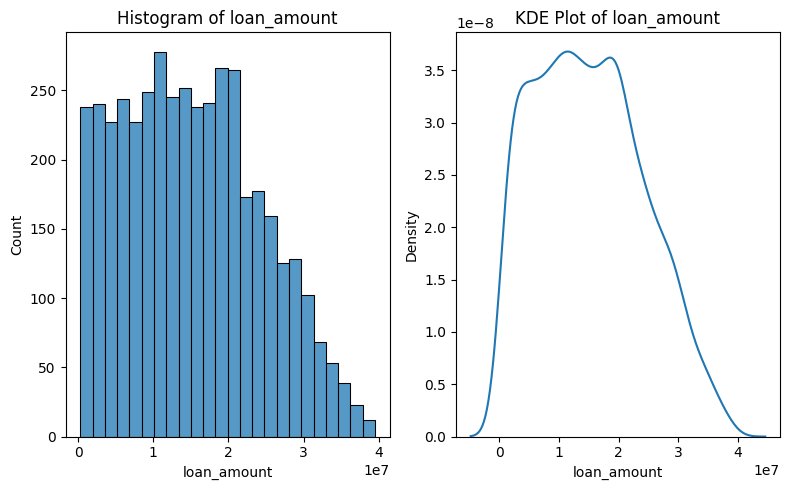

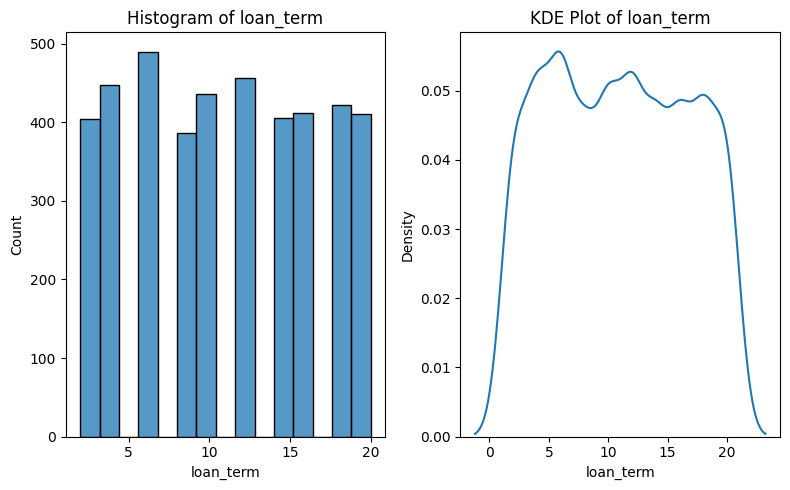

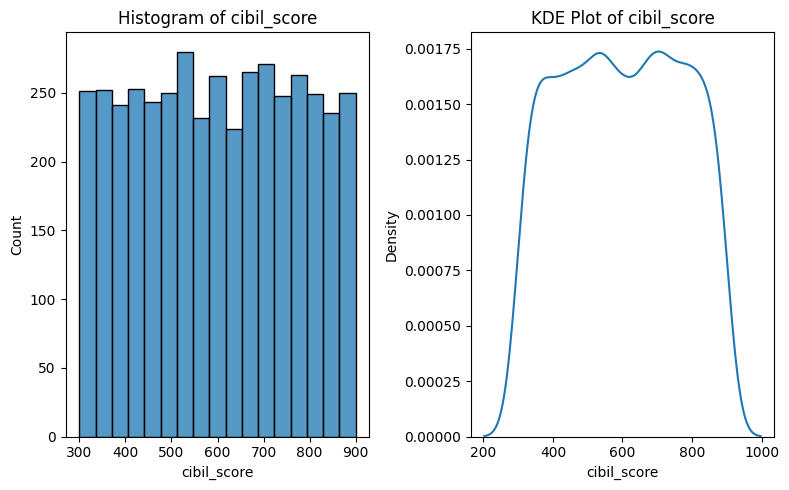

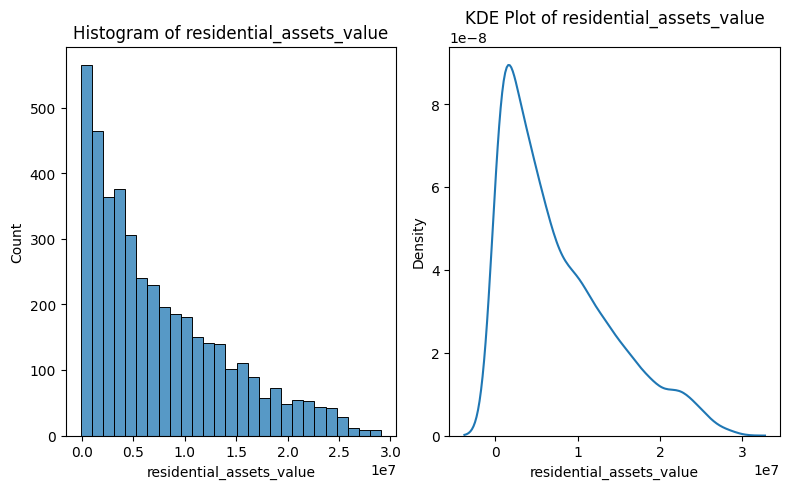

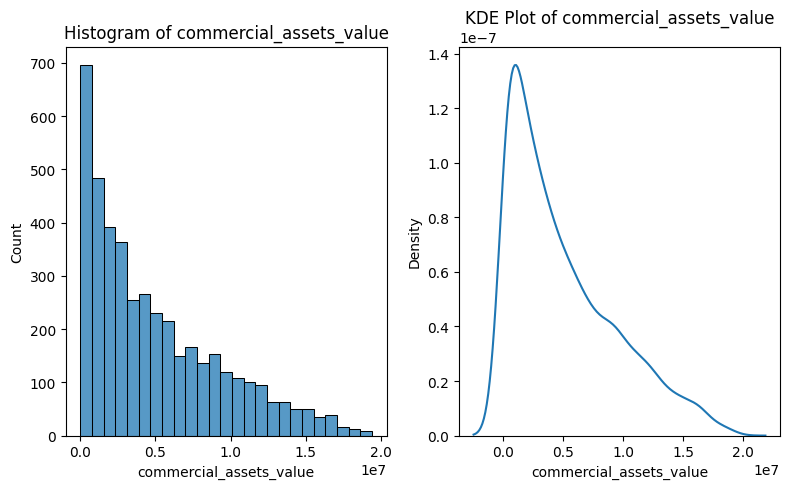

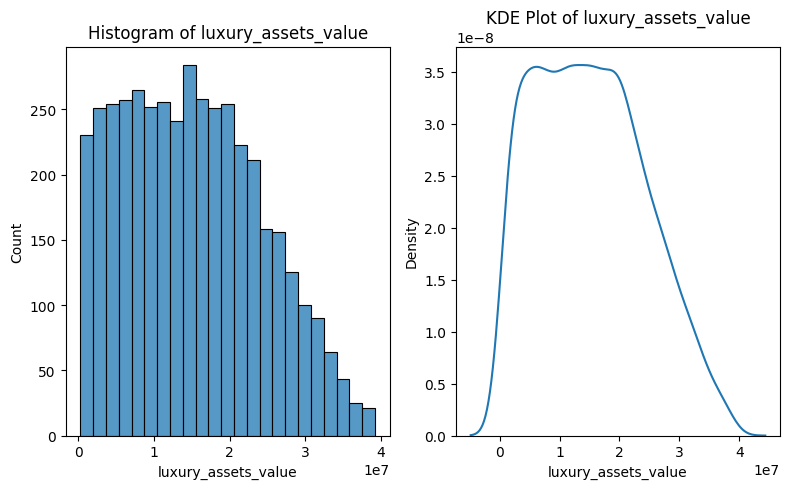

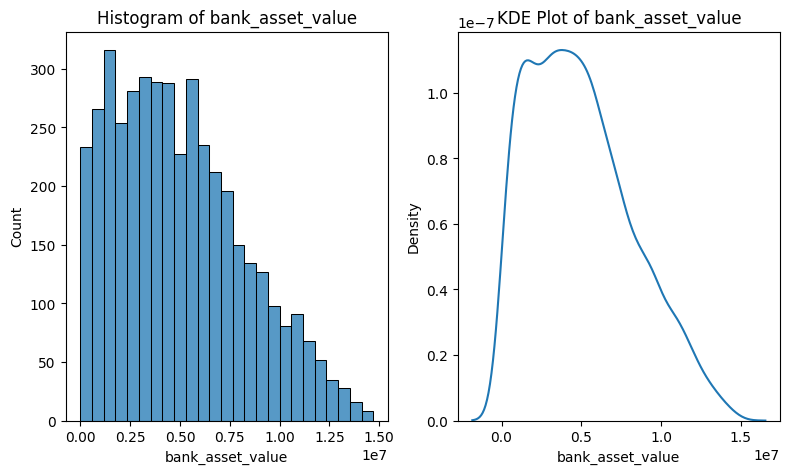

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for univariate analysis
numerical_cols = ['no_of_dependents', 'income_annum', 'loan_amount',
                   'loan_term', 'cibil_score', 'residential_assets_value',
                   'commercial_assets_value', 'luxury_assets_value',
                   'bank_asset_value']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=False)
    plt.title(f'Histogram of {col}')

    # KDE Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[col])
    plt.title(f'KDE Plot of {col}')

    plt.tight_layout()
    plt.show()

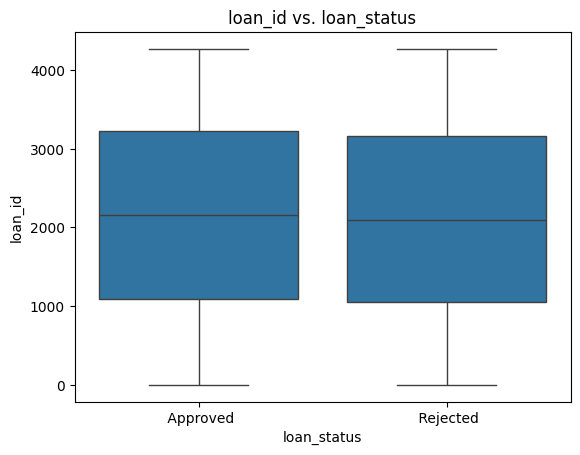

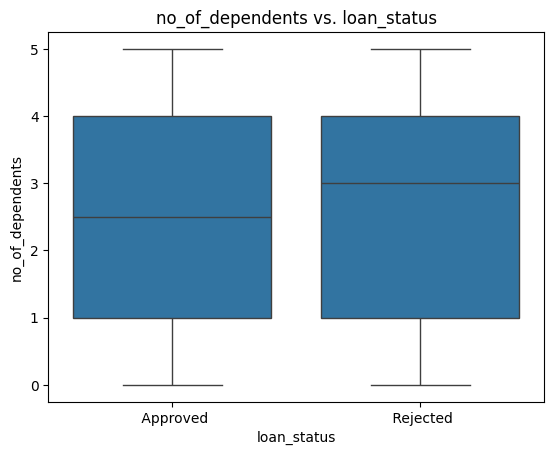

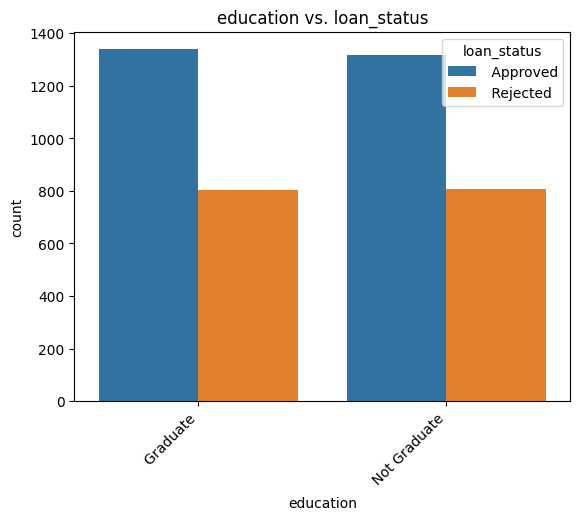

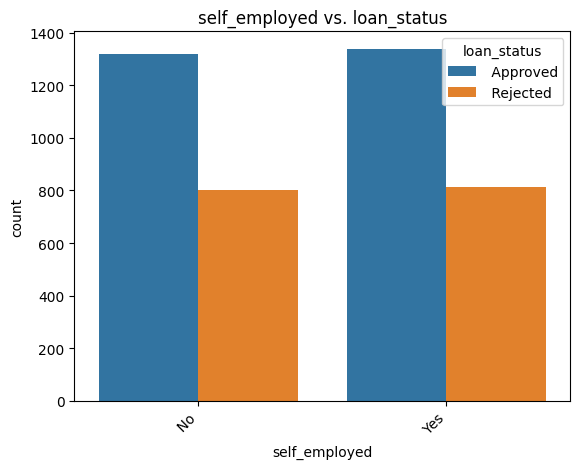

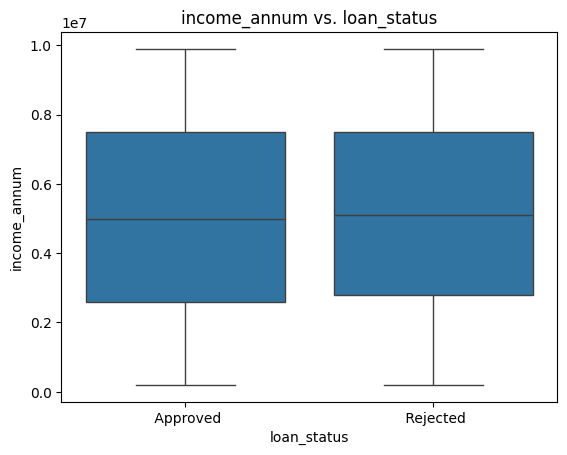

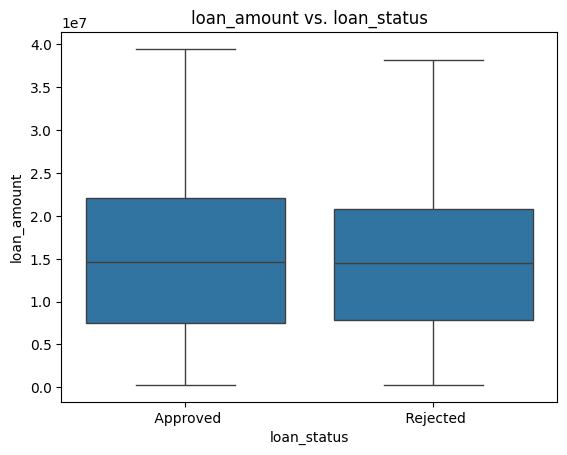

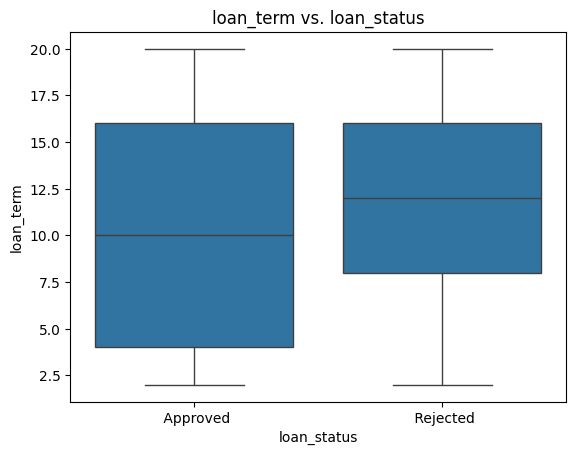

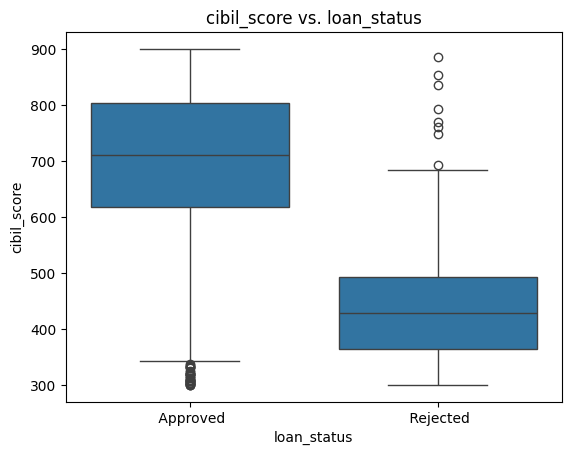

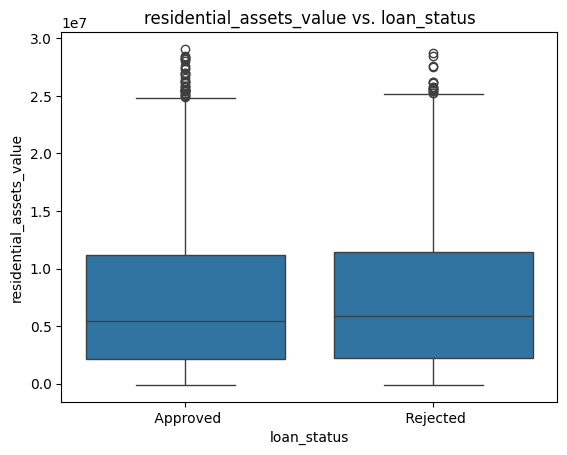

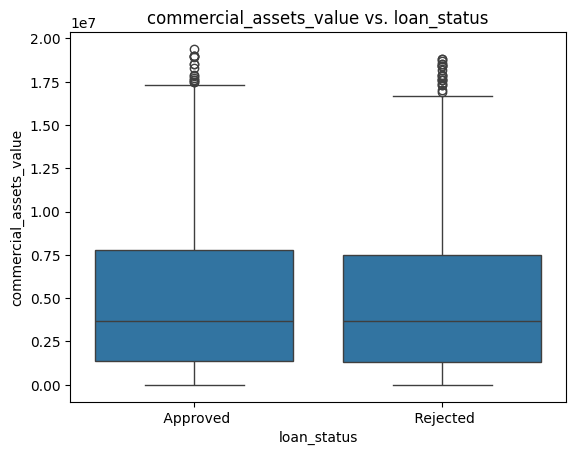

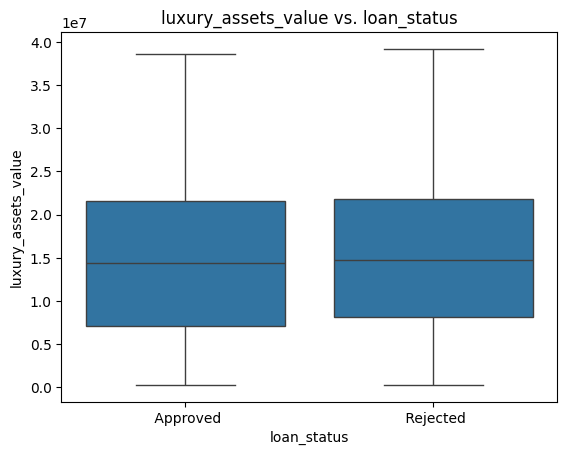

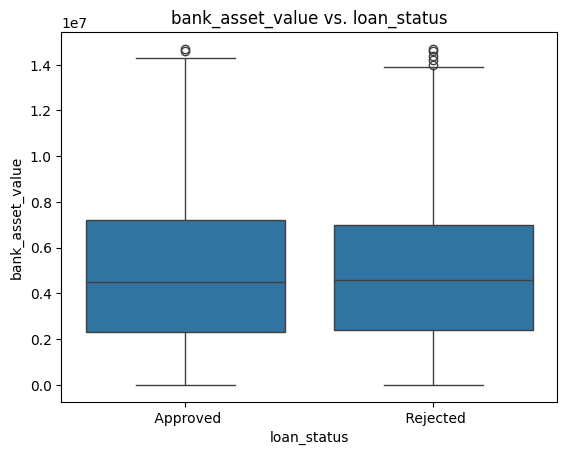

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'loan_status' is your dependent feature
dependent_feature = 'loan_status'

# Iterate through independent features (excluding the dependent feature)
for col in df.columns:
    if col != dependent_feature:
        plt.figure()  # Create a new figure for each plot

        if df[col].dtype == 'object':  # Categorical feature
            sns.countplot(x=col, hue=dependent_feature, data=df)
            plt.xticks(rotation=45, ha='right')
        else:  # Numerical feature
            sns.boxplot(x=dependent_feature, y=col, data=df)

        plt.title(f'{col} vs. {dependent_feature}')
        plt.show()

The presence of outliers is evident from the box plot diagram

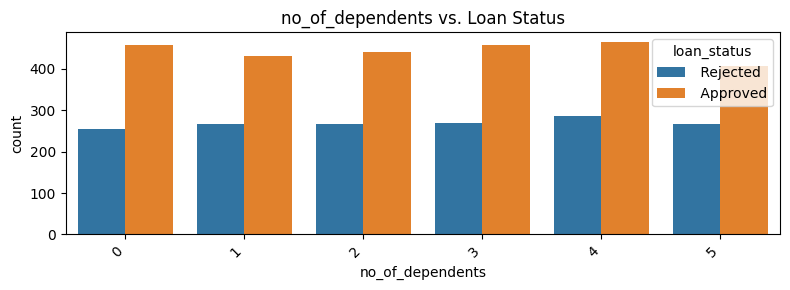

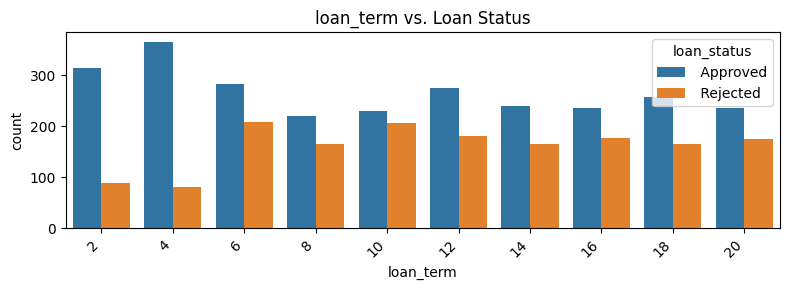

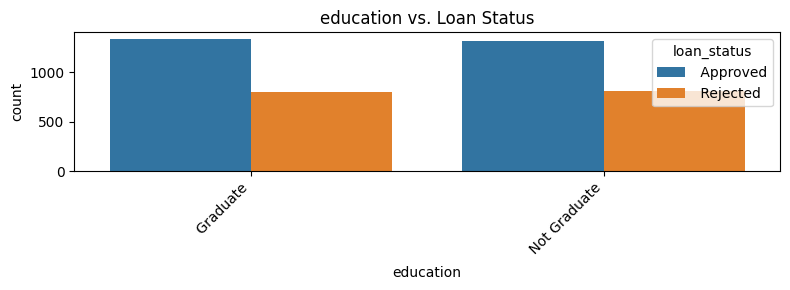

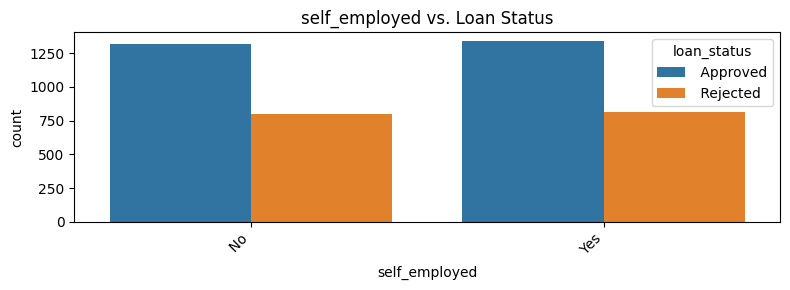

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['no_of_dependents', 'loan_term', 'education', 'self_employed']

for feature in features:
    plt.figure(figsize=(8, 3))  # Further reduced figure size
    sns.countplot(x=feature, hue='loan_status', data=df)
    plt.title(f'{feature} vs. Loan Status')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

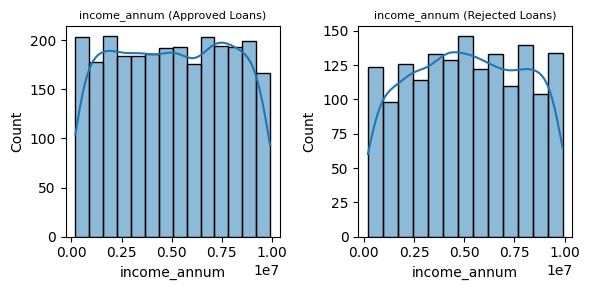

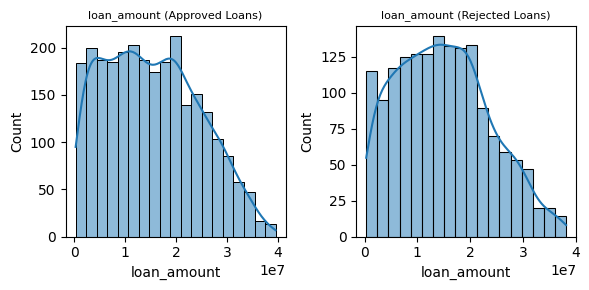

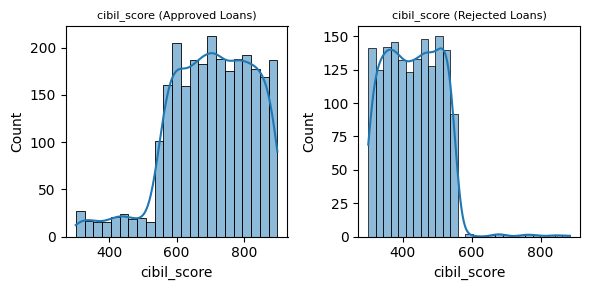

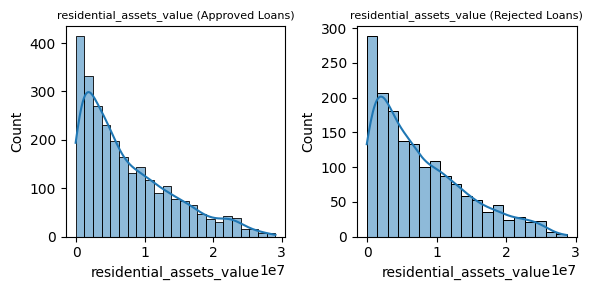

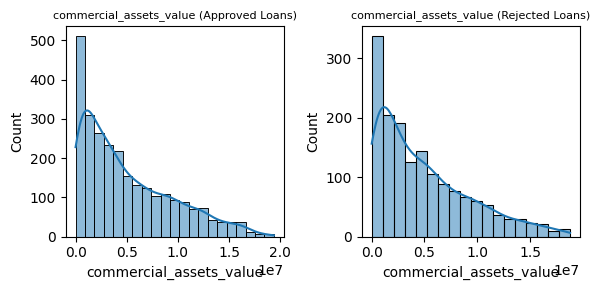

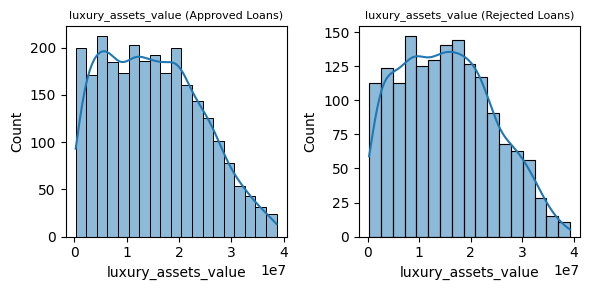

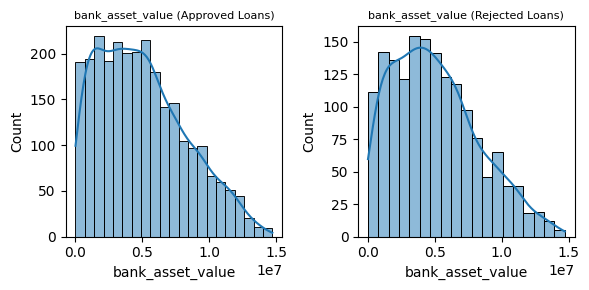

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous_features = ['income_annum', 'loan_amount', 'cibil_score',
                       'residential_assets_value', 'commercial_assets_value',
                       'luxury_assets_value', 'bank_asset_value']

for feature in continuous_features:
    plt.figure(figsize=(6, 3))

    # Approved loans
    plt.subplot(1, 2, 1)
    sns.histplot(df[df['loan_status'] == ' Approved'][feature], kde=True)  # Corrected filtering
    plt.title(f'{feature} (Approved Loans)', size = 8)
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Rejected loans
    plt.subplot(1, 2, 2)
    sns.histplot(df[df['loan_status'] == ' Rejected'][feature], kde=True)  # Corrected filtering
    plt.title(f'{feature} (Rejected Loans)', size = 8)
    plt.xlabel(feature)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

Clearly higher cibil is preferred by banks . in this case we can see the the company is preferring cibil of somewhere around 550 for loan acceptance

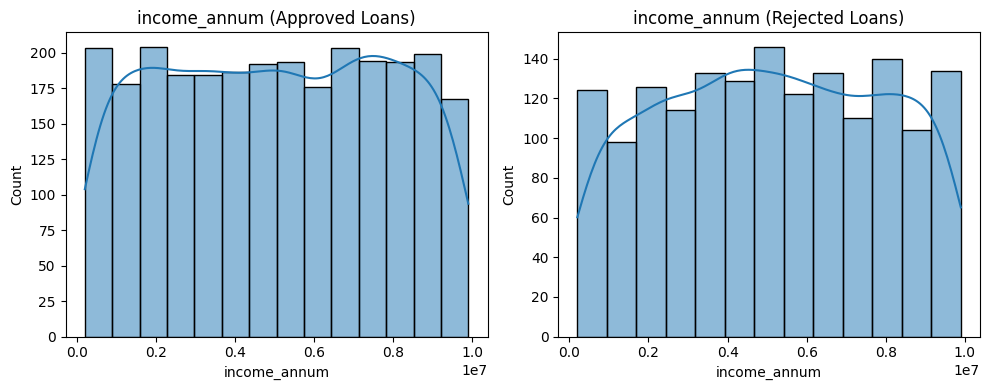

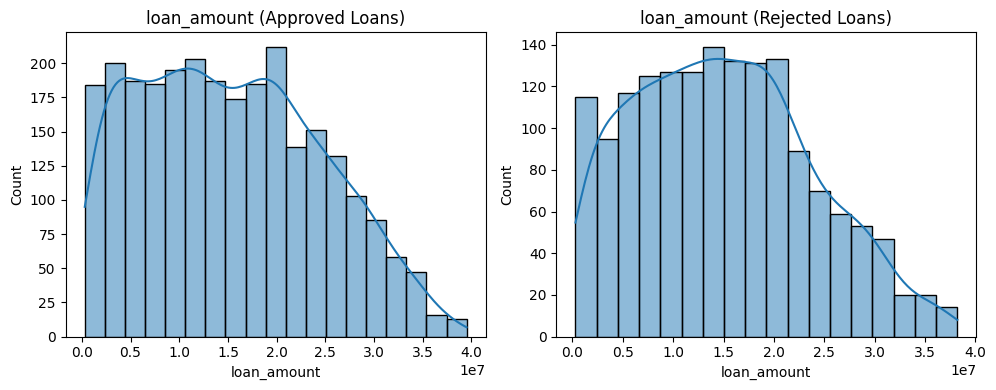

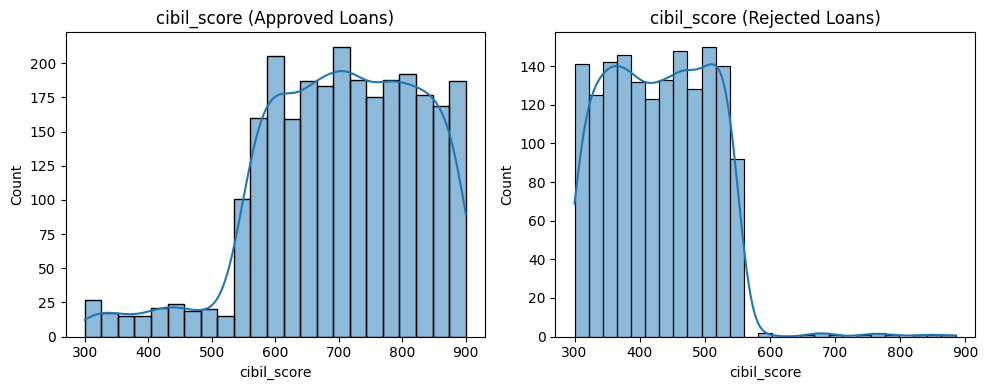

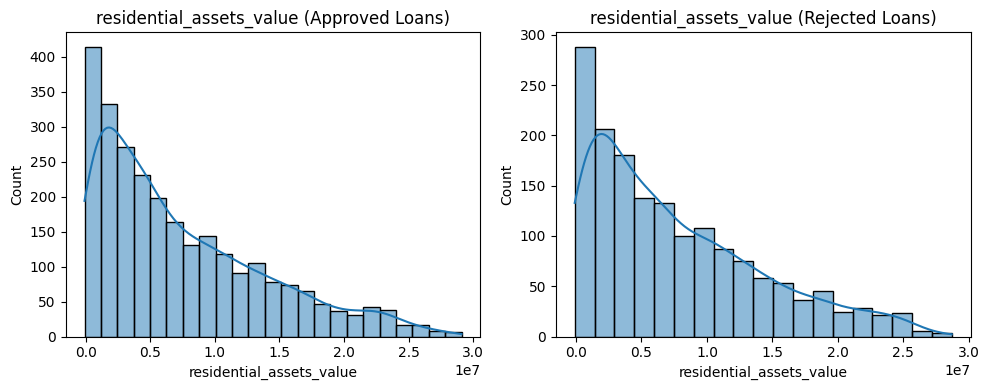

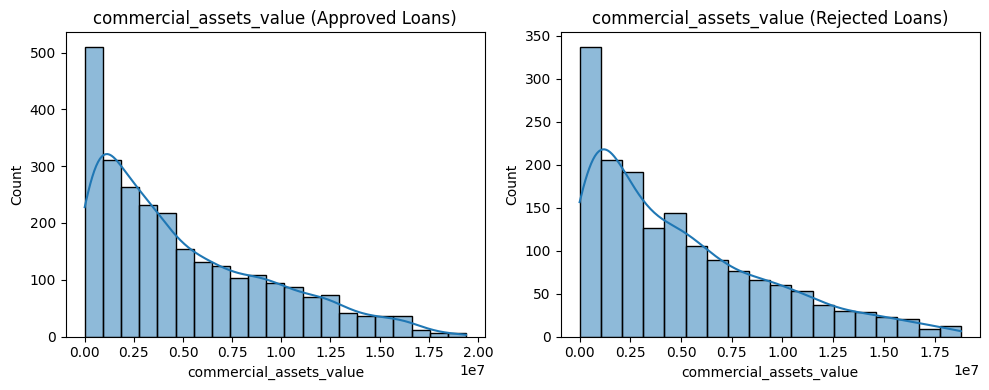

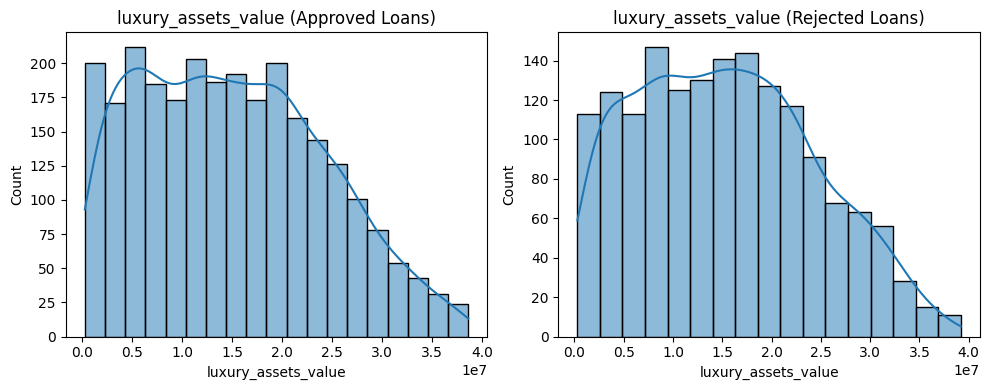

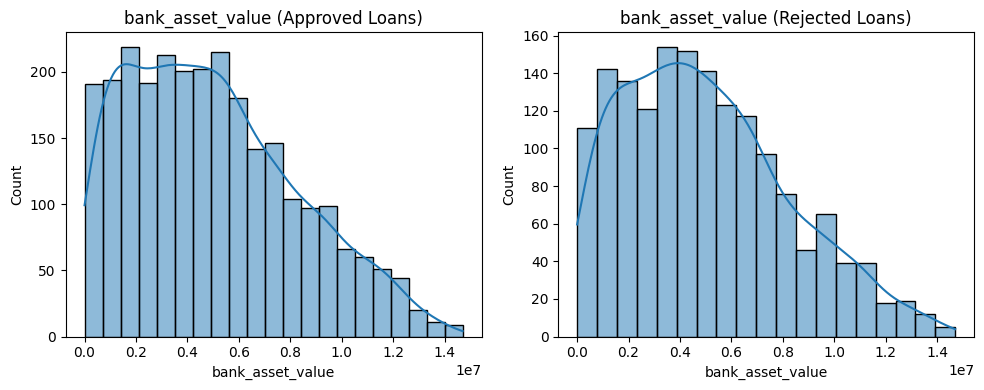

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous_features = ['income_annum', 'loan_amount', 'cibil_score',
                       'residential_assets_value', 'commercial_assets_value',
                       'luxury_assets_value', 'bank_asset_value']

for feature in continuous_features:
    plt.figure(figsize=(10, 4))

    # Approved loans
    plt.subplot(1, 2, 1)
    sns.histplot(df[df['loan_status'] == ' Approved'][feature], kde=True)  # Corrected filtering
    plt.title(f'{feature} (Approved Loans)')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Rejected loans
    plt.subplot(1, 2, 2)
    sns.histplot(df[df['loan_status'] == ' Rejected'][feature], kde=True)  # Corrected filtering
    plt.title(f'{feature} (Rejected Loans)')
    plt.xlabel(feature)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

In [44]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Assuming 'loan_status' is the target feature
target_feature = 'loan_status'

# Separate numerical and categorical features
numerical_features = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
                       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                       'luxury_assets_value', 'bank_asset_value']
categorical_features = ['education', 'self_employed']

# Perform hypothesis tests
for feature in numerical_features:
    group1 = df[df[target_feature] == ' Approved'][feature]
    group2 = df[df[target_feature] == ' Rejected'][feature]
    t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances
    print(f"Feature: {feature}, P-value: {p_value:.3f}", end=" ")
    if p_value < 0.05:
        print("Reject null hypothesis - Significant relation")
    else:
        print("Fail to reject null hypothesis - No significant relation")

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target_feature])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Feature: {feature}, P-value: {p_value:.3f}", end=" ")
    if p_value < 0.05:
        print("Reject null hypothesis - Significant relation")
    else:
        print("Fail to reject null hypothesis - No significant relation")

Feature: no_of_dependents, P-value: 0.237 Fail to reject null hypothesis - No significant relation
Feature: income_annum, P-value: 0.319 Fail to reject null hypothesis - No significant relation
Feature: loan_amount, P-value: 0.285 Fail to reject null hypothesis - No significant relation
Feature: loan_term, P-value: 0.000 Reject null hypothesis - Significant relation
Feature: cibil_score, P-value: 0.000 Reject null hypothesis - Significant relation
Feature: residential_assets_value, P-value: 0.348 Fail to reject null hypothesis - No significant relation
Feature: commercial_assets_value, P-value: 0.590 Fail to reject null hypothesis - No significant relation
Feature: luxury_assets_value, P-value: 0.311 Fail to reject null hypothesis - No significant relation
Feature: bank_asset_value, P-value: 0.656 Fail to reject null hypothesis - No significant relation
Feature: education, P-value: 0.772 Fail to reject null hypothesis - No significant relation
Feature: self_employed, P-value: 1.000 Fai

In [45]:
# Replace categorical values with numerical equivalents
df['education'] = df['education'].replace({' Graduate': 1, ' Not Graduate': 0})
df['self_employed'] = df['self_employed'].replace({' Yes': 1, ' No': 0})
df['loan_status'] = df['loan_status'].replace({' Approved': 1, ' Rejected': 0})

# Verify the changes
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [46]:
import pandas as pd
import numpy as np
from scipy import stats

# Numerical columns
numerical_cols = [ 'income_annum', 'loan_amount', 'cibil_score',
                   'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                   'bank_asset_value']

# Z-Score Method
z_scores = np.abs(stats.zscore(df[numerical_cols]))
outliers_zscore = (z_scores > 3).any(axis=1)
percentage_zscore = outliers_zscore.sum() / len(df) * 100

# IQR Method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
percentage_iqr = outliers_iqr.sum() / len(df) * 100

# Comparison
print("Percentage of outliers detected by each method:")
print("Z-Score:", percentage_zscore, "%")
print("IQR:", percentage_iqr, "%")

Percentage of outliers detected by each method:
Z-Score: 0.7730147575544624 %
IQR: 2.131646755680487 %


Since the graphs plotted shows skewness in our data, we adopt the IQR method and remove the outliers

In [47]:
# Numerical columns
numerical_cols = ['income_annum', 'loan_amount', 'cibil_score',
                   'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                   'bank_asset_value']

# IQR Method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
new_df = df[~outliers_iqr]

# Verify the changes
print("Original shape:", df.shape)
print("Shape after removing outliers:", new_df.shape)

Original shape: (4269, 13)
Shape after removing outliers: (4178, 13)


In [48]:
new_df.drop(columns=['loan_id'], inplace=True)
new_df.head()

<ipython-input-48-5e300142d8e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['loan_id'], inplace=True)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
5,0,1,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming 'loan_status' is the target variable and all necessary preprocessing is done
X = new_df.drop('loan_status', axis=1)
y = new_df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{name}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  Testing Accuracy: {test_accuracy:.4f}")

Logistic Regression:
  Training Accuracy: 0.7274
  Testing Accuracy: 0.7404
Decision Tree:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9785
Random Forest:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9797
Gradient Boosting:
  Training Accuracy: 0.9949
  Testing Accuracy: 0.9785
Support Vector Machine:
  Training Accuracy: 0.6230
  Testing Accuracy: 0.6232
K-Nearest Neighbors:
  Training Accuracy: 0.7139
  Testing Accuracy: 0.5550
Naive Bayes:
  Training Accuracy: 0.7870
  Testing Accuracy: 0.7560
XGBoost:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9844


Decision Tree and Random Forest: Achieving 100% training accuracy while having significantly lower testing accuracy strongly indicates overfitting. These models have likely learned the training data too well, including noise and specific patterns, and are not generalizing well to unseen data.
Potential Good Performance:

Gradient Boosting: Shows a high training accuracy (99.58%) with a slightly lower but still very good testing accuracy (97.85%). This suggests a good balance between learning the training data and generalizing to new data.
Underfitting or Other Issues:

Logistic Regression and Support Vector Machine: Both have relatively low training and testing accuracies (around 62-63%). This could indicate underfitting, meaning the models are too simple to capture the underlying patterns in the data. It could also suggest issues with feature selection, scaling, or hyperparameter tuning.

XGBoost: Joins the club of overfitting models with perfect training accuracy and a lower testing accuracy. Similar to Decision Tree and Random Forest, it needs regularization techniques to improve generalization.
Potential with Room for Improvement:

Naive Bayes: Shows a reasonable balance between training and testing accuracy (78.55% and 75.48%, respectively). It might benefit from feature engineering or hyperparameter tuning to further improve performance.
Underfitting or Other Issues:

K-Nearest Neighbors: Exhibits a significant drop in accuracy from training (71.42%) to testing (55.38%). This could indicate underfitting or sensitivity to the choice of distance metric or number of neighbors (k).

In [50]:
from sklearn.model_selection import cross_val_score

# Assuming 'loan_status' is the target variable, all necessary preprocessing is done,
# and models are initialized as in the previous response.

# Perform k-fold cross-validation (e.g., k=5)
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}:")
    print(f"  Mean Accuracy: {cv_scores.mean():.4f}")

Logistic Regression:
  Mean Accuracy: 0.6647
Decision Tree:
  Mean Accuracy: 0.9770
Random Forest:
  Mean Accuracy: 0.9823
Gradient Boosting:
  Mean Accuracy: 0.9809
Support Vector Machine:
  Mean Accuracy: 0.6230
K-Nearest Neighbors:
  Mean Accuracy: 0.5625
Naive Bayes:
  Mean Accuracy: 0.7674
XGBoost:
  Mean Accuracy: 0.9837


Based on the above results it is clear that  Random Forest and Gradient Boost along with XG Boost. We will now take only these models and perform hyperparameter tuning on it

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0]
}

# Initialize models
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X, y)

grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X, y)

# Print best parameters and scores
print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Best Accuracy:", grid_search_rf.best_score_)

print("Gradient Boosting - Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting - Best Accuracy:", grid_search_gb.best_score_)

Random Forest - Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest - Best Accuracy: 0.9827668108758558
Gradient Boosting - Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.8}
Gradient Boosting - Best Accuracy: 0.9822894880096266


In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'loan_status' is the target variable, all necessary preprocessing is done,
# and models (Random Forest and Gradient Boosting) are initialized and tuned.

models = {
    "Random Forest": RandomForestClassifier(**grid_search_rf.best_params_),  # Use best parameters from tuning
    "Gradient Boosting": GradientBoostingClassifier(**grid_search_gb.best_params_)  # Use best parameters from tuning
}

for name, model in models.items():
    # Get cross-validated predictions
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)

    # Print results
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Confusion Matrix:\n{conf_matrix}")

Random Forest:
  Accuracy: 0.9823
  Precision: 0.9792
  Recall: 0.9927
  F1-Score: 0.9859
  Confusion Matrix:
[[1520   55]
 [  19 2584]]
Gradient Boosting:
  Accuracy: 0.9818
  Precision: 0.9813
  Recall: 0.9896
  F1-Score: 0.9855
  Confusion Matrix:
[[1526   49]
 [  27 2576]]


Precision is an important evaluation metric for this dataset as higher precision indicates lower the number of false positives, thereby decreasing the chances of loan approval for those who are unlikely to pay back the loan. This is especially important in the context of a bank loan model as approving a loan to someone who is unlikely to pay it back can result in financial losses for the bank. Therefore, optimizing for precision can help the bank to minimize the risk of defaults and bad loans.

Despite comparable accuracy, Gradient Boosting was selected over Random Forest due to its slightly higher precision, which is crucial for minimizing the risk of approving loans that might default and lead to financial losses.

In [56]:
# PRINTING THE RESULTS OF GRADIENT BOOST

print("Gradient Boosting - Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting:")
print(f"  Accuracy: {0.9818:.4f}")
print(f"  Precision: {0.9813:.4f}")
print(f"  Recall: {0.9896:.4f}")
print(f"  F1-Score: {0.9855:.4f}")
print("  Confusion Matrix:\n[[1526   49]\n [  27 2576]]")

Gradient Boosting - Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.8}
Gradient Boosting:
  Accuracy: 0.9818
  Precision: 0.9813
  Recall: 0.9896
  F1-Score: 0.9855
  Confusion Matrix:
[[1526   49]
 [  27 2576]]


Through a comprehensive analysis of the loan approval dataset, including data preprocessing, exploratory data analysis, and model development, we successfully built a predictive model using Gradient Boosting that demonstrates high accuracy and, importantly, high precision. This model can serve as a valuable tool for financial institutions to assess loan applications, minimizing the risk of approving loans that are likely to default. While the model exhibits strong performance, continuous monitoring and potential refinements based on evolving economic conditions and borrower profiles are recommended to ensure its ongoing effectiveness. This project highlights the potential of machine learning in automating and enhancing the loan approval process, ultimately benefiting both lenders and borrowers.